In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

bands = pd.read_csv('data/ma_bands_data.csv', index_col=0)
bands['theme'] = bands['theme'].fillna('')

songs = pd.read_csv('data/ma_songs_lyrics.csv', index_col=0)
songs = songs[  (songs['lyrics'] != '(lyrics not available)')
              & (songs['lyrics'] != '(Instrumental)')
              & ~songs['lyrics'].str.contains('[^\x00-\x7f]')]
songs = pd.merge(bands, songs, left_on='name', right_on='band_name')

In [2]:
songs

,name,url,genre,theme,label,country,location,status,date,years,album_url,band_name,album_name,album_type,song_name,song_id,lyrics
0,$ilverdollar,https://www.metal-archives.com/bands/%24ilverd...,Heavy/Power Metal,"['Occult', ' Fantasy', ' Human issues']",NaN,Sweden,"Nyköping, Södermanland",Active,1996.0,1996-present,https://www.metal-archives.com/bands/%24ilverd...,$ilverdollar,Covers from Hell,Full-length,Ace of Spades (Motörhead cover),803073,"If you like to gamble, I tell you I'm your man..."
1,$ilverdollar,https://www.metal-archives.com/bands/%24ilverd...,Heavy/Power Metal,"['Occult', ' Fantasy', ' Human issues']",NaN,Sweden,"Nyköping, Södermanland",Active,1996.0,1996-present,https://www.metal-archives.com/bands/%24ilverd...,$ilverdollar,Covers from Hell,Full-length,Bark at the Moon (Ozzy Osbourne cover),803063,SCREAMS BREAK THE SILENCE \r\nWAKING FROM THE ...
2,$ilverdollar,https://www.metal-archives.com/bands/%24ilverd...,Heavy/Power Metal,"['Occult', ' Fantasy', ' Human issues']",NaN,Sweden,"Nyköping, Södermanland",Active,1996.0,1996-present,https://www.metal-archives.com/bands/%24ilverd...,$ilverdollar,Covers from Hell,Full-length,Crazy Train (Ozzy Osbourne cover),803071,"All aboard, hah hah \r\n\r\nCrazy, but that's ..."
3,$ilverdollar,https://www.metal-archives.com/bands/%24ilverd...,Heavy/Power Metal,"['Occult', ' Fantasy', ' Human issues']",NaN,Sweden,"Nyköping, Södermanland",Active,1996.0,1996-present,https://www.metal-archives.com/bands/%24ilverd...,$ilverdollar,Covers from Hell,Full-length,Don't Talk to Strangers (Dio cover),803068,Don't talk to strangers \r\nMmmmh \r\n\r\nDon'...
4,$ilverdollar,https://www.metal-archives.com/bands/%24ilverd...,Heavy/Power Metal,"['Occult', ' Fantasy', ' Human issues']",NaN,Sweden,"Nyköping, Södermanland",Active,1996.0,1996-present,https://www.metal-archives.com/bands/%24ilverd...,$ilverdollar,Covers from Hell,Full-length,Freewheel Burning (Judas Priest cover),803070,Fast and furious \r\nWe ride the universe \r\n...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799759,폐허,https://www.metal-archives.com/bands/%ED%8F%90...,Dark Ambient/Atmospheric Black Metal,"['Nature', ' Anti-war', ' Sorrow', ' Depression']",NaN,"Korea, South",NaN,On hold,2001.0,2001-2015,https://www.metal-archives.com/bands/%ED%8F%90...,폐허,Songs for Darkspirits,Full-length,"Sweet, Gesture of the Death",1150474,"slumber,\r\nPeace.\r\n\r\nthis harmony to natu..."
799760,폐허,https://www.metal-archives.com/bands/%ED%8F%90...,Dark Ambient/Atmospheric Black Metal,"['Nature', ' Anti-war', ' Sorrow', ' Depression']",NaN,"Korea, South",NaN,On hold,2001.0,2001-2015,https://www.metal-archives.com/bands/%ED%8F%90...,폐허,When Fatigue Devours Reincarnation,EP,Diary of a Decaying Man,1150491,At the end of Chaos(The man who engulfed himse...
799761,폐허,https://www.metal-archives.com/bands/%ED%8F%90...,Dark Ambient/Atmospheric Black Metal,"['Nature', ' Anti-war', ' Sorrow', ' Depression']",NaN,"Korea, South",NaN,On hold,2001.0,2001-2015,https://www.metal-archives.com/bands/%ED%8F%90...,폐허,흉가,Full-length,통곡의 서막 / Prelude to Tremendous Sadness,2213275,"my lady, wake up,\r\nin this cold night.\r\nyo..."
799762,폐허,https://www.metal-archives.com/bands/%ED%8F%90...,Dark Ambient/Atmospheric Black Metal,"['Nature', ' Anti-war', ' Sorrow', ' Depression']",NaN,"Korea, South",NaN,On hold,2001.0,2001-2015,https://www.metal-archives.com/bands/%ED%8F%90...,폐허,흉가,Full-length,흉가에 얽힌 이야기 Part III / The Tale from the Hounte...,2213273,Beauty was this hill\r\nfilled with this blood...


In [3]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(binary=True, token_pattern="middle eastern|[0-9a-z'\-]+", min_df=1000,
                             stop_words=['metal', 'rock', "'n'", 'roll', 'early', 'mid', 'later',
                                         'and', 'elements', 'influences', 'various', 'with'])
genre_mat = vectorizer.fit_transform(songs['genre'])
genre_names = vectorizer.get_feature_names_out()
print(genre_names)

['alternative' 'ambient' 'atmospheric' 'avant-garde' 'black' 'blackened'
 'brutal' 'crossover' 'crust' 'dark' 'death' 'deathcore' 'depressive'
 'doom' 'drone' 'electronic' 'epic' 'experimental' 'extreme' 'folk'
 'funeral' 'goregrind' 'gothic' 'grindcore' 'groove' 'hard' 'hardcore'
 'heavy' 'industrial' 'melodic' 'metalcore' 'neoclassical' 'noise'
 'nu-metal' 'nwobhm' 'pagan' 'post-black' 'post-metal' 'power'
 'progressive' 'psychedelic' 'punk' 'raw' 'slam' 'sludge' 'southern'
 'speed' 'stoner' 'symphonic' 'technical' 'thrash' 'viking']


In [4]:
genre_sum = genre_mat.sum(axis=0)
top_genre = np.argsort(genre_sum)[0, -1 : -11 : -1]
print(top_genre[0])
print(genre_names[top_genre])
print((genre_sum[0, top_genre] / songs.shape[0] * 100).astype(int))

[[10 50  4 27 38 29 13 39 23 46]]
[['death' 'thrash' 'black' 'heavy' 'power' 'melodic' 'doom' 'progressive'
  'grindcore' 'speed']]
[[35 23 21 17  9  9  7  7  3  3]]


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(smooth_idf=False)
# vectorizer = CountVectorizer(stop_words='english')
lyrics_mat = vectorizer.fit_transform(songs['lyrics'].iloc[:])
vectorizer.get_feature_names_out()

array(['00', '000', '000000001', ..., 'zzooouhh', 'zzu', 'zzzzz'],
      dtype=object)

In [18]:
from sklearn.model_selection import train_test_split

def get_train_test(X, y, test_size):
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y.toarray().ravel(),
                                                        test_size=test_size,
                                                        random_state=0)

    not_belong_pos = np.flatnonzero(~y_train)
    belong_pos = np.flatnonzero(y_train)
    np.random.seed(0)
    not_belong_pos = np.random.choice(not_belong_pos, belong_pos.shape[0], replace=False)
    sample_pos = np.concatenate((not_belong_pos, belong_pos))

    X_train = X_train[sample_pos]
    y_train = np.concatenate((np.zeros(not_belong_pos.shape[0], dtype=y.dtype),
                              np.ones(belong_pos.shape[0], dtype=y.dtype)))

    # print('Sample size:', not_belong_pos.shape[0], '+', belong_pos.shape[0])

    return X_train, X_test, y_train, y_test

In [78]:
from sklearn.naive_bayes import MultinomialNB

genre_pos = 4
X_train, X_test, y_train, y_test = get_train_test(lyrics_mat[: 10000], genre_mat[: 10000, genre_pos], 0.1)

mnb = MultinomialNB()
y_pred = mnb.fit(X_train, y_train).predict(X_test)
mnb.score(X_test, y_test)

0.696

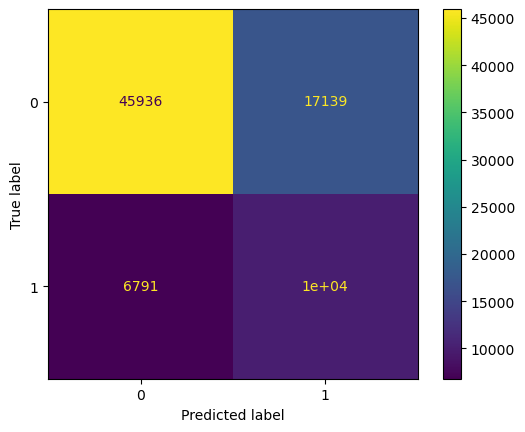

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [71]:
from sklearn.neighbors import KNeighborsClassifier

genre_pos = 4
X_train, X_test, y_train, y_test = get_train_test(lyrics_mat[: 20000], genre_mat[: 20000, genre_pos], 0.1)

neigh = KNeighborsClassifier(n_neighbors=60)
y_pred = neigh.fit(X_train, y_train).predict(X_test)
neigh.score(X_test, y_test)

0.669

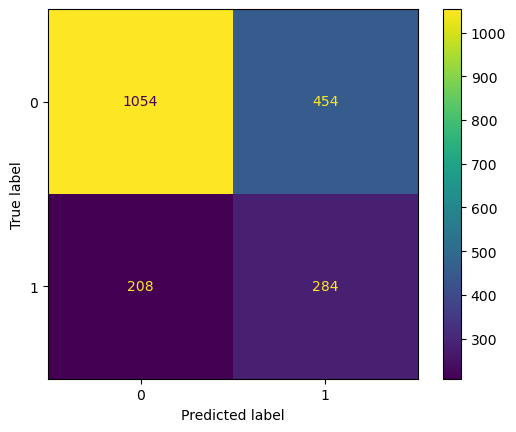

In [72]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [79]:
from sklearn.svm import SVC

genre_pos = 4
X_train, X_test, y_train, y_test = get_train_test(lyrics_mat[: 10000], genre_mat[: 10000, genre_pos], 0.1)

svc = SVC()
y_pred = svc.fit(X_train, y_train).predict(X_test)
svc.score(X_test, y_test)

0.621

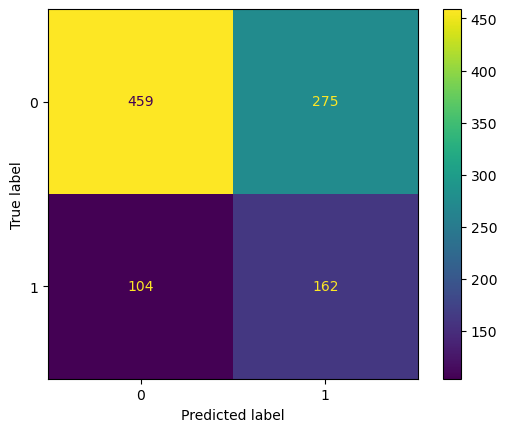

In [80]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [9]:
songs[genre_mat[:, genre_pos].astype(bool).todense()]

,name,url,genre,theme,label,country,location,status,date,years,album_url,band_name,album_name,album_type,song_name,song_id,lyrics
77,(V.E.G.A.),https://www.metal-archives.com/bands/%28V.E.G....,"Experimental Black Metal, Experimental/Electro...",['Insanity'],NaN,International,"Turin, Piedmont, Italy / Oslo, Norway",Unknown,1998.0,1998-?,https://www.metal-archives.com/bands/%28V.E.G....,(V.E.G.A.),Cocaine,Full-length,Beton #1,356068,"On the cement streets...\r\n...with Hate,\r\nU..."
78,(V.E.G.A.),https://www.metal-archives.com/bands/%28V.E.G....,"Experimental Black Metal, Experimental/Electro...",['Insanity'],NaN,International,"Turin, Piedmont, Italy / Oslo, Norway",Unknown,1998.0,1998-?,https://www.metal-archives.com/bands/%28V.E.G....,(V.E.G.A.),Cocaine,Full-length,Burning in My Own Dream of Life,356069,"Grey clouds darken my mind, rain slows down it..."
79,(V.E.G.A.),https://www.metal-archives.com/bands/%28V.E.G....,"Experimental Black Metal, Experimental/Electro...",['Insanity'],NaN,International,"Turin, Piedmont, Italy / Oslo, Norway",Unknown,1998.0,1998-?,https://www.metal-archives.com/bands/%28V.E.G....,(V.E.G.A.),Cocaine,Full-length,Consumed Seclusion,356070,"In a vast ocean, in the penetrating dark of th..."
80,(V.E.G.A.),https://www.metal-archives.com/bands/%28V.E.G....,"Experimental Black Metal, Experimental/Electro...",['Insanity'],NaN,International,"Turin, Piedmont, Italy / Oslo, Norway",Unknown,1998.0,1998-?,https://www.metal-archives.com/bands/%28V.E.G....,(V.E.G.A.),Cocaine,Full-length,Insex Infect,356066,Ich reiss mir adern aus. Mein blut. schwarz un...
81,(V.E.G.A.),https://www.metal-archives.com/bands/%28V.E.G....,"Experimental Black Metal, Experimental/Electro...",['Insanity'],NaN,International,"Turin, Piedmont, Italy / Oslo, Norway",Unknown,1998.0,1998-?,https://www.metal-archives.com/bands/%28V.E.G....,(V.E.G.A.),Cocaine,Full-length,Kill Me,356072,"(,,,Ny Art is the Engraved Heart of God...) Lo..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799759,폐허,https://www.metal-archives.com/bands/%ED%8F%90...,Dark Ambient/Atmospheric Black Metal,"['Nature', ' Anti-war', ' Sorrow', ' Depression']",NaN,"Korea, South",NaN,On hold,2001.0,2001-2015,https://www.metal-archives.com/bands/%ED%8F%90...,폐허,Songs for Darkspirits,Full-length,"Sweet, Gesture of the Death",1150474,"slumber,\r\nPeace.\r\n\r\nthis harmony to natu..."
799760,폐허,https://www.metal-archives.com/bands/%ED%8F%90...,Dark Ambient/Atmospheric Black Metal,"['Nature', ' Anti-war', ' Sorrow', ' Depression']",NaN,"Korea, South",NaN,On hold,2001.0,2001-2015,https://www.metal-archives.com/bands/%ED%8F%90...,폐허,When Fatigue Devours Reincarnation,EP,Diary of a Decaying Man,1150491,At the end of Chaos(The man who engulfed himse...
799761,폐허,https://www.metal-archives.com/bands/%ED%8F%90...,Dark Ambient/Atmospheric Black Metal,"['Nature', ' Anti-war', ' Sorrow', ' Depression']",NaN,"Korea, South",NaN,On hold,2001.0,2001-2015,https://www.metal-archives.com/bands/%ED%8F%90...,폐허,흉가,Full-length,통곡의 서막 / Prelude to Tremendous Sadness,2213275,"my lady, wake up,\r\nin this cold night.\r\nyo..."
799762,폐허,https://www.metal-archives.com/bands/%ED%8F%90...,Dark Ambient/Atmospheric Black Metal,"['Nature', ' Anti-war', ' Sorrow', ' Depression']",NaN,"Korea, South",NaN,On hold,2001.0,2001-2015,https://www.metal-archives.com/bands/%ED%8F%90...,폐허,흉가,Full-length,흉가에 얽힌 이야기 Part III / The Tale from the Hounte...,2213273,Beauty was this hill\r\nfilled with this blood...
